In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import FCM, GKFCM

import numpy as np
import math
from random import shuffle

def scatter_2d(data):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    plt.scatter(data[:, 0], data[:, 1], color=colors[1], lw=0)
    plt.xlim(np.min(data[:,0])-0.1*np.min(data[:,0]), np.max(data[:,0])+0.1*np.min(data[:,0]))
    plt.ylim(np.min(data[:,1])-0.1*np.min(data[:,0]), np.max(data[:,1])+0.1*np.min(data[:,0]))
    plt.title('Original data')
    plt.show()


def generate_2d(clusters, q=1000):
    noise=10
    res = np.empty((q, 2))
    centers = q/5 + np.random.uniform(size=(clusters, 2)) * q*clusters/5
    radiuses = 50 + np.random.uniform(size=clusters) * q/5
    for i in range(q):
        ind = np.random.randint(clusters)
        alpha = np.random.uniform(high=2*math.pi)
        r = np.random.uniform(high=radiuses[ind])
        res[i] = centers[ind] + \
                 np.array([r * math.cos(alpha), r * math.sin(alpha)]) + \
                 np.array([np.random.randint(noise), np.random.randint(noise)])
    return res



# Generate fake data

Generating sample data with 5 clusters and 500 samples...


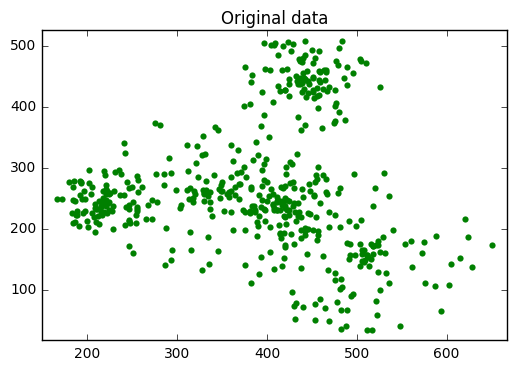

Calculating memberships
### 31
finish 0.00116617201729  <  0.0012
distance sum:  109686491.55


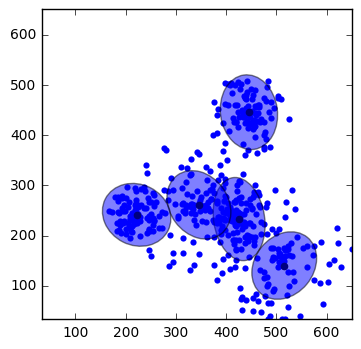

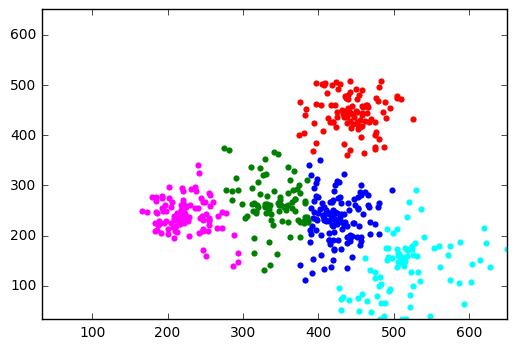

Memberships obtained: [[ 0.17693877  0.71020969  0.04222469  0.02125112  0.04937572]
 [ 0.12914462  0.46577865  0.0380064   0.05660531  0.31046502]
 [ 0.82582113  0.10385403  0.01417508  0.03657635  0.01957341]
 ..., 
 [ 0.51988465  0.16581824  0.03380911  0.22349896  0.05698904]
 [ 0.2140648   0.10117716  0.04424384  0.5829869   0.0575273 ]
 [ 0.13554366  0.11106419  0.10449254  0.58453666  0.06436296]]
[[18  0 24 81  0]
 [71  0  0 14  0]
 [ 1  0  0  0 98]
 [ 0  0 85  0  0]
 [14 94  0  0  0]]
Cluster 0 has 19.0 incorrect samples classified from 100.0
Cluster 1 has 29.0 incorrect samples classified from 100.0
Cluster 2 has 2.0 incorrect samples classified from 100.0
Cluster 3 has 15.0 incorrect samples classified from 100.0
Cluster 4 has 6.0 incorrect samples classified from 100.0


In [14]:
num_clusters = 5
num_samples = 100 * num_clusters # number of samples to generate
print('Generating sample data with {0} clusters and {1} samples...'.format(num_clusters,num_samples))
data,y = FCM.generate_2d(num_clusters, num_samples)
scatter_2d(data)

print('Calculating memberships')
fc = GKFCM.GKFCM(num_clusters=num_clusters,m=2, seed=5)
memberships=fc.fit(data)
fc.scatter_clusters_data()
print('Memberships obtained:',memberships)
from sklearn.metrics import confusion_matrix
cross_val=confusion_matrix(fc.results,y)
print(cross_val)
for i in range(num_clusters):
    print('Cluster {0} has {1} incorrect samples classified from {2}'.format(i,num_samples/num_clusters-np.max(cross_val[i]),num_samples/num_clusters))

In [3]:
print('Calculating memberships')
fc = GKFCM(num_clusters=num_clusters,m=2, seed=5)
memberships=fc.fit(data)
fc.scatter_clusters_data()
print('Memberships obtained:',memberships)
from sklearn.metrics import confusion_matrix
cross_val=confusion_matrix(fc.results,y)
print(cross_val)
for i in range(num_clusters):
    print('Cluster {0} has {1} incorrect samples classified from {2}'.format(i,num_samples/num_clusters-np.max(cross_val[i]),num_samples/num_clusters))

Calculating memberships


TypeError: 'module' object is not callable

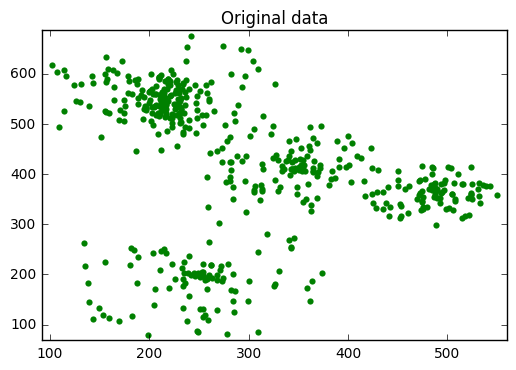

[GustafsonKessel cluster# v=[ 369.19726621  448.47724557] A=[[ 1.  0.]
 [ 0.  1.]], GustafsonKessel cluster# v=[  79.51667038  271.04143708] A=[[ 1.  0.]
 [ 0.  1.]], GustafsonKessel cluster# v=[ 522.11604324  599.0089702 ] A=[[ 1.  0.]
 [ 0.  1.]], GustafsonKessel cluster# v=[ 304.15795215  212.60505631] A=[[ 1.  0.]
 [ 0.  1.]], GustafsonKessel cluster# v=[ 289.10923048  411.31289393] A=[[ 1.  0.]
 [ 0.  1.]]]
### 42
finish 0.00130423972739  <  0.0014399999999999999
distance sum:  140405138.0


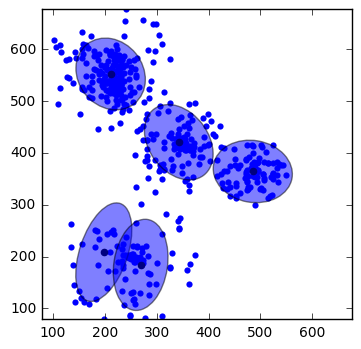

[GustafsonKessel cluster# v=[ 342.56639536  420.43169727] A=[[ 1.15198063  0.32195364]
 [ 0.32195364  0.95804923]], GustafsonKessel cluster# v=[ 197.94674949  208.43391816] A=[[ 1.9707113  -0.50792899]
 [-0.50792899  0.63834406]], GustafsonKessel cluster# v=[ 485.32017542  364.11373857] A=[[ 0.7918317   0.08541222]
 [ 0.08541222  1.27210775]], GustafsonKessel cluster# v=[ 269.06246993  183.93010285] A=[[ 1.68841006 -0.16463414]
 [-0.16463414  0.60832639]], GustafsonKessel cluster# v=[ 211.16721253  552.04515367] A=[[ 1.04580924  0.15406456]
 [ 0.15406456  0.97889352]]]


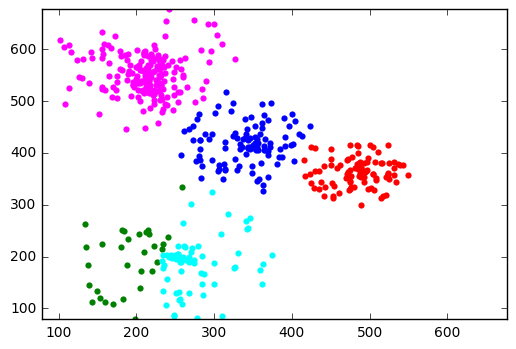

In [4]:
scatter_2d(xs)

clusters = [GustafsonKessel.GKCluster(np.max(xs), 2) for k in range(num_clusters)]
print(clusters)
fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=1, verbose_level=0, verbose_iteration=100)
print (fc.C)
fc.scatter_clusters_data()

In [5]:
fc.C

[GustafsonKessel cluster# v=[ 342.56639536  420.43169727] A=[[ 1.15198063  0.32195364]
  [ 0.32195364  0.95804923]],
 GustafsonKessel cluster# v=[ 197.94674949  208.43391816] A=[[ 1.9707113  -0.50792899]
  [-0.50792899  0.63834406]],
 GustafsonKessel cluster# v=[ 485.32017542  364.11373857] A=[[ 0.7918317   0.08541222]
  [ 0.08541222  1.27210775]],
 GustafsonKessel cluster# v=[ 269.06246993  183.93010285] A=[[ 1.68841006 -0.16463414]
  [-0.16463414  0.60832639]],
 GustafsonKessel cluster# v=[ 211.16721253  552.04515367] A=[[ 1.04580924  0.15406456]
  [ 0.15406456  0.97889352]]]

In [5]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

reduced_data = PCA(n_components=2).fit_transform(data)


In [6]:
np.max(reduced_data)

9.9825675457879406

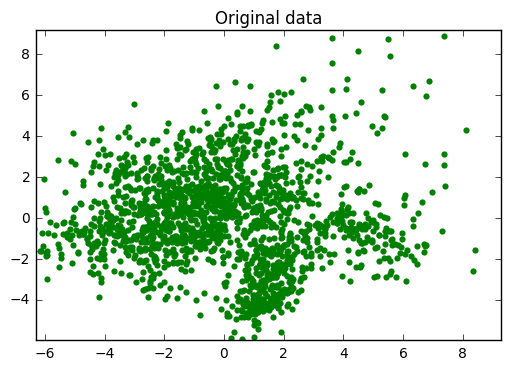

/home/aleix/AMLT/new/FuzzyClustring.py:73: RuntimeWarning: invalid value encountered in double_scalars
  if max_dif < abs(old - self.U[j][i]):


### 171
finish 0.00405124361077  <  0.0042998169599999985
distance sum:  472223.561024


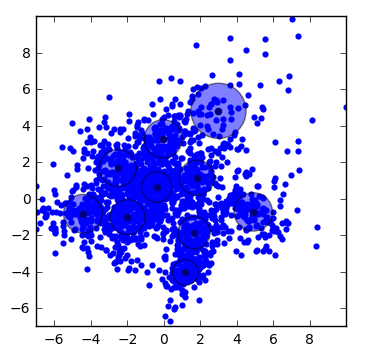

[CMeans cluster# v=[ 1.80644328  1.14605359] r=0.9574554453845135, CMeans cluster# v=[-0.39218535  0.6373966 ] r=0.8317143274411098, CMeans cluster# v=[-0.0300064   3.28218766] r=1.043385034286467, CMeans cluster# v=[-2.52009126  1.68562417] r=1.0131646660887734, CMeans cluster# v=[ 2.9942987   4.81337729] r=1.5111965304545198, CMeans cluster# v=[-1.98993887 -1.0108855 ] r=0.9546656778242868, CMeans cluster# v=[ 1.65934317 -1.86118181] r=0.8814763978410665, CMeans cluster# v=[ 4.90020391 -0.72435771] r=1.0504132244890338, CMeans cluster# v=[-4.43675922 -0.82121468] r=1.0571115404770273, CMeans cluster# v=[ 1.18002239 -4.04110273] r=0.6999436800708397]


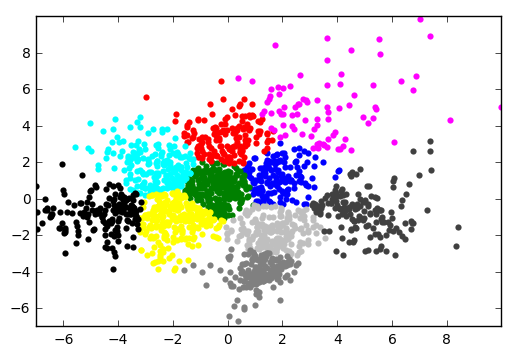

In [7]:
num_clusters = 10

scatter_2d(reduced_data)

clusters = [CMean.CMeanCluster(np.max(reduced_data), 2) for k in range(num_clusters)]
fc = FuzzyClustring.FuzzyClassifier(reduced_data, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=1, verbose_level=0, verbose_iteration=100)
print (fc.C)
fc.scatter_clusters_data()

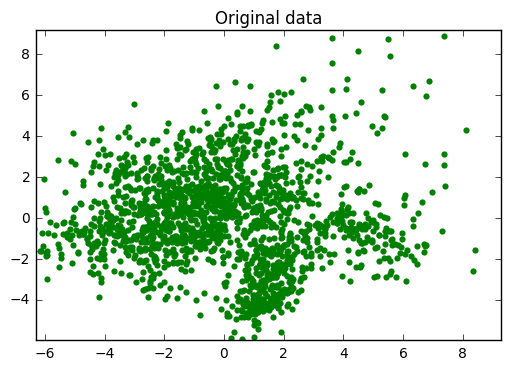

/home/aleix/AMLT/new/FuzzyClustring.py:73: RuntimeWarning: invalid value encountered in double_scalars
  if max_dif < abs(old - self.U[j][i]):


ci: 0
uis: 1797
ci: 1
uis: 1797
ci: 2
uis: 1797
ci: 3
uis: 1797
ci: 4
uis: 1797
ci: 5
uis: 1797
ci: 6
uis: 1797
ci: 7
uis: 1797
ci: 8
uis: 1797
ci: 9
uis: 1797
ci: 0
uis: 1797
ci: 1
uis: 1797
ci: 2
uis: 1797
ci: 3
uis: 1797
ci: 4
uis: 1797
ci: 5
uis: 1797
ci: 6
uis: 1797
ci: 7
uis: 1797
ci: 8
uis: 1797
ci: 9
uis: 1797
ci: 0
uis: 1797
ci: 1
uis: 1797
ci: 2
uis: 1797
ci: 3
uis: 1797
ci: 4
uis: 1797
ci: 5
uis: 1797
ci: 6
uis: 1797
ci: 7
uis: 1797
ci: 8
uis: 1797
ci: 9
uis: 1797
ci: 0
uis: 1797
ci: 1
uis: 1797
ci: 2
uis: 1797
ci: 3
uis: 1797
ci: 4
uis: 1797
ci: 5
uis: 1797
ci: 6
uis: 1797
ci: 7
uis: 1797
ci: 8
uis: 1797
ci: 9
uis: 1797
ci: 0
uis: 1797
ci: 1
uis: 1797
ci: 2
uis: 1797
ci: 3
uis: 1797
ci: 4
uis: 1797
ci: 5
uis: 1797
ci: 6
uis: 1797
ci: 7
uis: 1797
ci: 8
uis: 1797
ci: 9
uis: 1797
ci: 0
uis: 1797
ci: 1
uis: 1797
ci: 2
uis: 1797
ci: 3
uis: 1797
ci: 4
uis: 1797
ci: 5
uis: 1797
ci: 6
uis: 1797
ci: 7
uis: 1797
ci: 8
uis: 1797
ci: 9
uis: 1797
ci: 0
uis: 1797
ci: 1
uis: 1797
ci: 2
ui

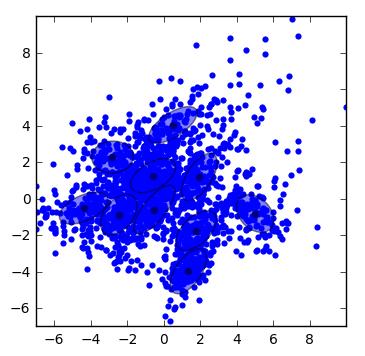

[GustafsonKessel cluster# v=[-0.5257411  -0.59634239] A=[[ 1.78209712 -1.12893904]
 [-1.12893904  1.27630718]], GustafsonKessel cluster# v=[-4.39115986 -0.51789416] A=[[ 0.76449425 -0.60231326]
 [-0.60231326  1.78259192]], GustafsonKessel cluster# v=[ 0.49946051  4.04545265] A=[[ 0.99995712 -0.8673825 ]
 [-0.8673825   1.75242755]], GustafsonKessel cluster# v=[-2.46661529 -0.87046549] A=[[ 1.24150857 -0.48572486]
 [-0.48572486  0.99550553]], GustafsonKessel cluster# v=[-2.81051656  2.27923258] A=[[ 0.77244057 -0.0253342 ]
 [-0.0253342   1.29542888]], GustafsonKessel cluster# v=[-0.5855913   1.26153413] A=[[ 0.87315585 -0.58268842]
 [-0.58268842  1.53411993]], GustafsonKessel cluster# v=[ 5.0016565  -0.81221082] A=[[ 1.0651578   0.35359012]
 [ 0.35359012  1.05620592]], GustafsonKessel cluster# v=[ 1.77183519 -1.7428562 ] A=[[ 1.1519772  -0.64955624]
 [-0.64955624  1.23433286]], GustafsonKessel cluster# v=[ 1.94590782  1.19255518] A=[[ 1.67503176 -0.77138634]
 [-0.77138634  0.95224277]], 

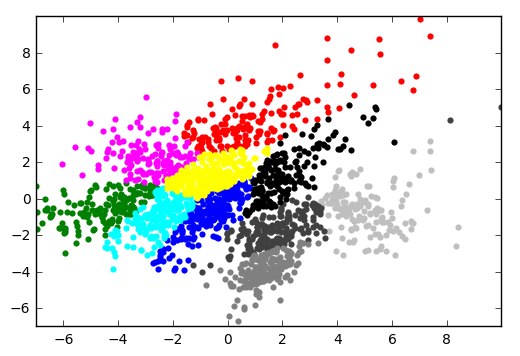

In [8]:
num_clusters = 10

scatter_2d(reduced_data)

clusters = [GustafsonKessel.GKCluster(np.max(reduced_data), 2) for k in range(num_clusters)]
fc = FuzzyClustring.FuzzyClassifier(reduced_data, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=1, verbose_level=0, verbose_iteration=100)
print (fc.C)
fc.scatter_clusters_data()

In [9]:
print (fc.U[1])

[ 0.34684517  0.033131    0.02644391  0.04903102  0.04024992  0.25238386
  0.02509208  0.03203973  0.17918284  0.01560046]


In [10]:
reduced_data[0]

array([ 1.91422151, -0.95454005])

[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [-0.5257411  -0.59634239]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [-4.39115986 -0.51789416]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [ 0.49946051  4.04545265]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [-2.46661529 -0.87046549]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [-2.81051656  2.27923258]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [-0.5855913   1.26153413]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [ 5.0016565  -0.81221082]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [ 1.77183519 -1.7428562 ]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [ 1.94590782  1.19255518]
[ 1.  1.] 1.99651350916 1.99651350916 1.99651350916 [ 1.34538008 -3.97493003]


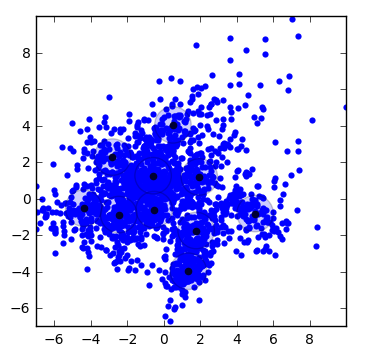

In [11]:
import matplotlib.patches as shapes
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:, order]

def draw(self):
    A = np.array([[1**.5, 0], [0, 1**.5]])
    vals, vecs = eigsorted(A)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    # Width and height are "full" widths, not radius
    height, width = self.r * np.sqrt(vals)
    print (vals,self.r,width,height,self.v)
    res = shapes.Ellipse(xy=self.v, width=width, height=height, angle=theta)
    return res


shapes = [draw(c) for c in fc.C]
fig = plt.figure(1)
ax = fig.add_subplot(111, aspect='equal')

ax.scatter(fc.X[:, 0], fc.X[:, 1], lw=0)

for i, c in enumerate(fc.C):
    ax.scatter(c.center()[0], c.center()[1], color='black')
    ax.add_artist(shapes[i])
    shapes[i].set_alpha(.2)

ax.set_xlim(np.min(fc.X), np.max(fc.X))
ax.set_ylim(np.min(fc.X), np.max(fc.X))
plt.show()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import CMean, FuzzyClustring, GustafsonKessel

import numpy as np
import math
from random import shuffle
def generate_2d(clusters, q=1000):
    noise=10
    res = np.empty((q, 2))
    centers = q/5 + np.random.uniform(size=(clusters, 2)) * q*clusters/5
    radiuses = 50 + np.random.uniform(size=clusters) * q/5
    for i in range(q):
        ind = np.random.randint(clusters)
        alpha = np.random.uniform(high=2*math.pi)
        r = np.random.uniform(high=radiuses[ind])
        res[i] = centers[ind] + \
                 np.array([r * math.cos(alpha), r * math.sin(alpha)]) + \
                 np.array([np.random.randint(noise), np.random.randint(noise)])
    return res

In [11]:
import FCM
import numpy as np
num_clusters = 5

np.random.seed(5) # for reproducibility
q = 100 * num_clusters
xs = generate_2d(num_clusters, q=q)
fcm=FCM.CMeanCluster(num_clusters,m=2)

### 1
finish 0.0  <  0.1
distance sum:  78873875.2685


TypeError: center() takes at least 1 argument (0 given)

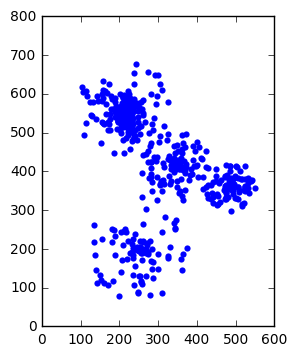

In [12]:
fcm.fit(xs,increase_iteration=20, increase_factor=1.2, plot_level=1, verbose_level=0, verbose_iteration=100)

In [13]:
fcm.C

['CMeans cluster# v=130.47830534027545 r=[ 306.62412713  262.03808837]',
 'CMeans cluster# v=12.938329260036738 r=[ 204.41001286  107.07270414]',
 'CMeans cluster# v=47.60109688051645 r=[ 463.16445417  139.62272577]',
 'CMeans cluster# v=110.72223219712913 r=[ 296.94916813  478.83054076]',
 'CMeans cluster# v=74.20339335548043 r=[ 448.47724557   79.51667038]']